# ELEC0134 - Applied Machine Learning Systems Assignment 22-23
## A1: Gender Detection

*Note preprocessing step is skipped as preprocessing was completed in SVM notebook.

In [3]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [4]:
# Loading in training and test data from npy files
X_train = np.load('all_features_train.npy')
y_train = np.load('gender_labels_train.npy')

X_test = np.load('all_features_test.npy')
y_test = np.load('gender_labels_test.npy')

In [5]:
print('features_train: ', X_train.shape)
print('features_test: ', X_test.shape)
print('labels_train: ', y_train.shape)
print('labels_test: ', y_test.shape)

features_train:  (4798, 136)
features_test:  (970, 136)
labels_train:  (4798,)
labels_test:  (970,)


In [6]:
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [2, 4, 6, 8, 10, 12]}


# rfm = random forest model
rfm = RandomForestClassifier()
grid_search = GridSearchCV(rfm, param_grid, verbose = 3, cv = 10)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END .....max_depth=2, n_estimators=50;, score=0.838 total time=   1.1s
[CV 2/10] END .....max_depth=2, n_estimators=50;, score=0.798 total time=   0.8s
[CV 3/10] END .....max_depth=2, n_estimators=50;, score=0.808 total time=   0.5s
[CV 4/10] END .....max_depth=2, n_estimators=50;, score=0.802 total time=   0.8s
[CV 5/10] END .....max_depth=2, n_estimators=50;, score=0.812 total time=   0.5s
[CV 6/10] END .....max_depth=2, n_estimators=50;, score=0.815 total time=   0.7s
[CV 7/10] END .....max_depth=2, n_estimators=50;, score=0.823 total time=   0.5s
[CV 8/10] END .....max_depth=2, n_estimators=50;, score=0.819 total time=   0.7s
[CV 9/10] END .....max_depth=2, n_estimators=50;, score=0.785 total time=   0.8s
[CV 10/10] END ....max_depth=2, n_estimators=50;, score=0.835 total time=   0.6s
[CV 1/10] END ....max_depth=2, n_estimators=100;, score=0.850 total time=   1.0s
[CV 2/10] END ....max_depth=2, n_estimators=10

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'n_estimators': [50, 100, 150]},
             verbose=3)

In [7]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 8, 'n_estimators': 100}
Best score:  0.8620259220598468


In [8]:
rfm = RandomForestClassifier(**grid_search.best_params_)

In [9]:
rfm.fit(X_train, y_train)

RandomForestClassifier(max_depth=8)

In [10]:
y_pred = rfm.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8463917525773196


In [12]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[434  55]
 [ 94 387]]


In [13]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

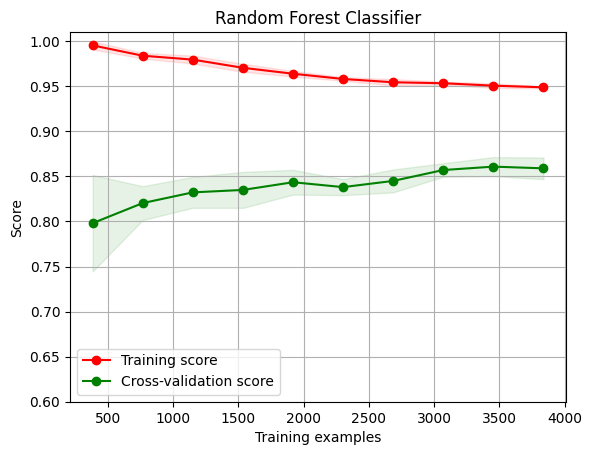

In [14]:
train_sizes, train_scores, test_scores = learning_curve(rfm, X_train, y_train, cv=5, n_jobs=-1, 
                                                       train_sizes=np.linspace(0.1, 1.0, 10), 
                                                       scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Random Forest Classifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim((0.6, 1.01))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()